In [16]:
import matplotlib.pyplot as plt
import pickle, os, sys
from XANES2020_code.general_tools import imagesc, load_object, choose_cal_file, get_cal_files
import numpy as np
from XANES2020_code.rossFilterAnalysis.rossTheoretical import E,Ttotal, Tth, Al_layers,filterBacking


In [15]:
run_name = '20200907/run01'
diag = 'Lundatron'
shot_num = 48

# mask_filepath = os.path.join(XRAY_CODE_PATH,r'filter_masks/20200827_run09_Lundatron_filter_masks.pkl')
mask_filepath = choose_cal_file(run_name,shot_num,diag,'Lundatron_filter_masks')
mask_obj=load_object(mask_filepath)

filter_filepath = choose_cal_file(run_name,shot_num,diag,'Lundatron_filter_pack')
filter_obj = load_object(filter_filepath)

null_trans = 1
for reg in filter_obj['null_fRegions']:
    null_trans = null_trans*reg.T_E
    
E_keV = reg.E_keV
print('Material  ' + str([x.material for x in filter_obj['null_fRegions']]))
print('Thickness [microns] ' + str([x.d for x in filter_obj['null_fRegions']]))


Material  ['Mylar', 'Al', 'Air', 'Be', 'C35H28N2O7']
Thickness [microns] [27.6, 48, 85000.0, 250, 150]


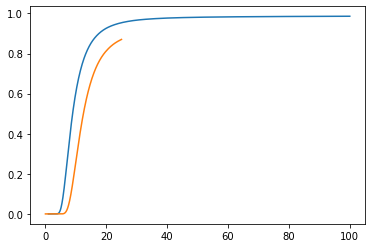

In [18]:
plt.plot(E_keV,null_trans)
plt.plot(E*1e-3,Ttotal)